In [13]:
from fastai.vision import *
import numpy as np
import torch

import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
dataset_root = "./data/fashion_pt" 
Dataset = FashionMNIST

In [55]:
transform = transforms.ToTensor()
trainset = Dataset(dataset_root, download=True, train=True, transform=transform)
testset = Dataset(dataset_root, download=True, train=False, transform=transform)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)

In [56]:
def save_img(tensor, train_or_valid, target, index):
    torchvision.utils.save_image(tensor, './data/fashion_pt/' + train_or_valid + '/' + target + '/' + index +'.jpg', nrow=1, padding=0, normalize=False, range=None, scale_each=False, pad_value=0)


In [57]:
# Generating images for train

for index in np.arange(trainset.data.size()[0]):
    save_img(trainset.data[index], 'train', str(trainset.targets[index].numpy()), str(index))

In [58]:
# Generating images for validation

for index in np.arange(testset.data.size()[0]):
    save_img(testset.data[index], 'valid', str(testset.targets[index].numpy()), str(index))

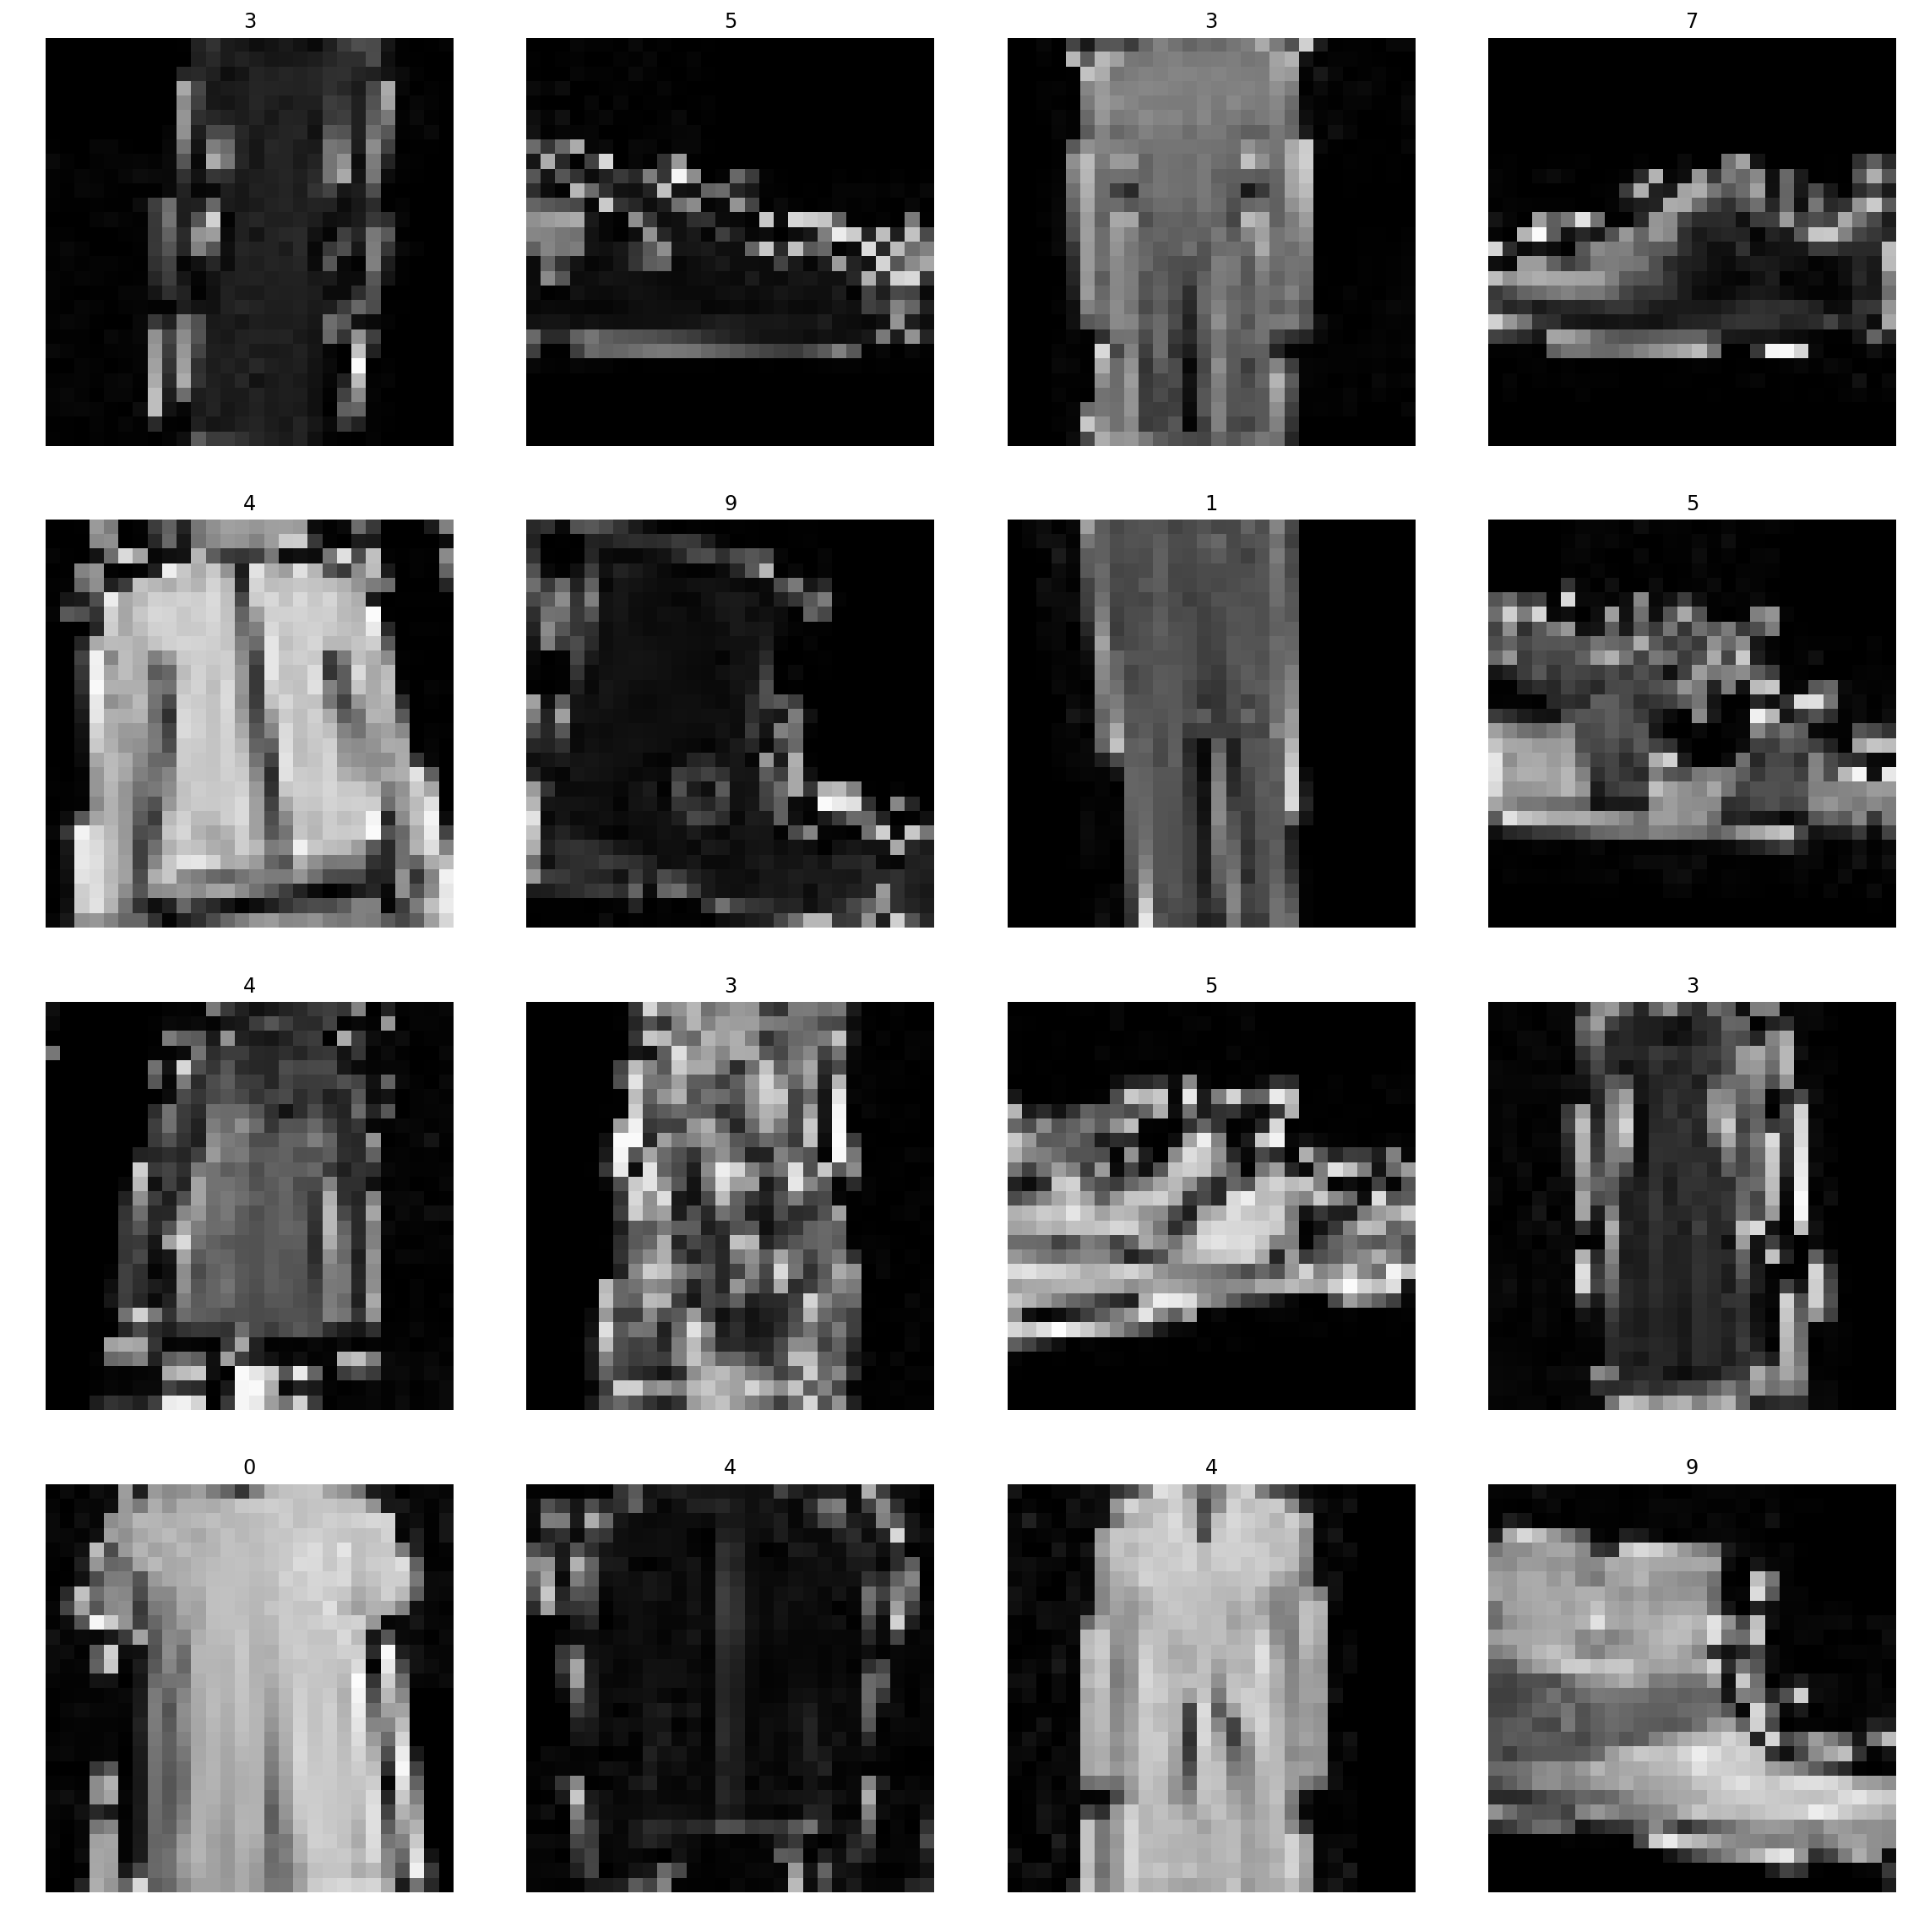

In [65]:
data = ImageDataBunch.from_folder(dataset_root, ds_tfms=get_transforms()).normalize(imagenet_stats)
data.show_batch(rows=4)

In [66]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)


In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


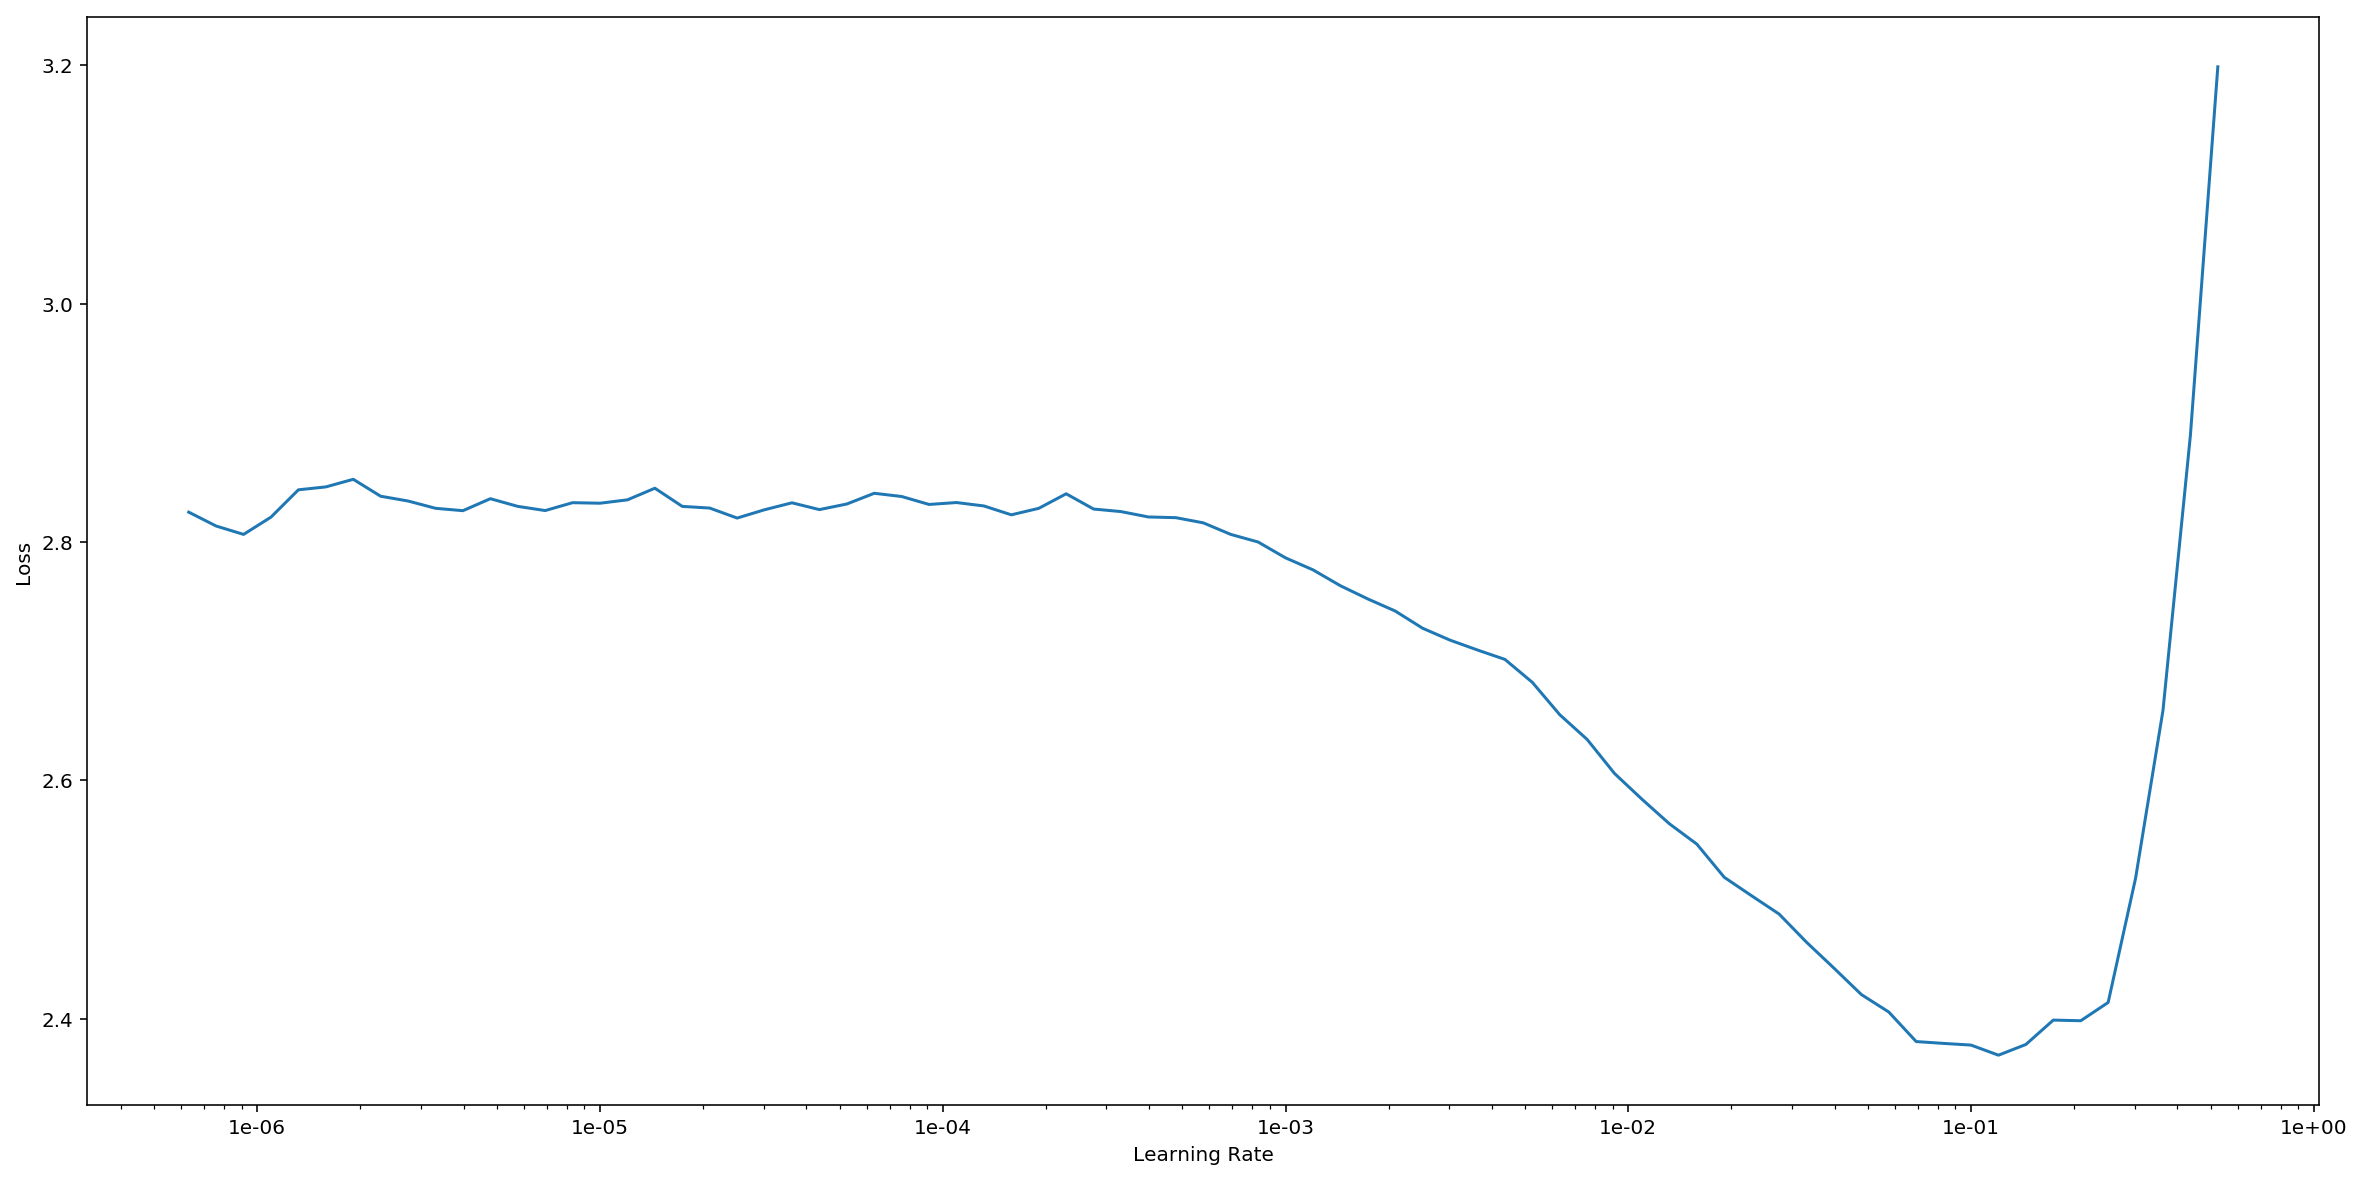

In [62]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(1,max_lr=5e-2) #67% 8min

epoch,train_loss,valid_loss,accuracy,time
0,0.609468,0.555242,0.794000,08:07


In [68]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


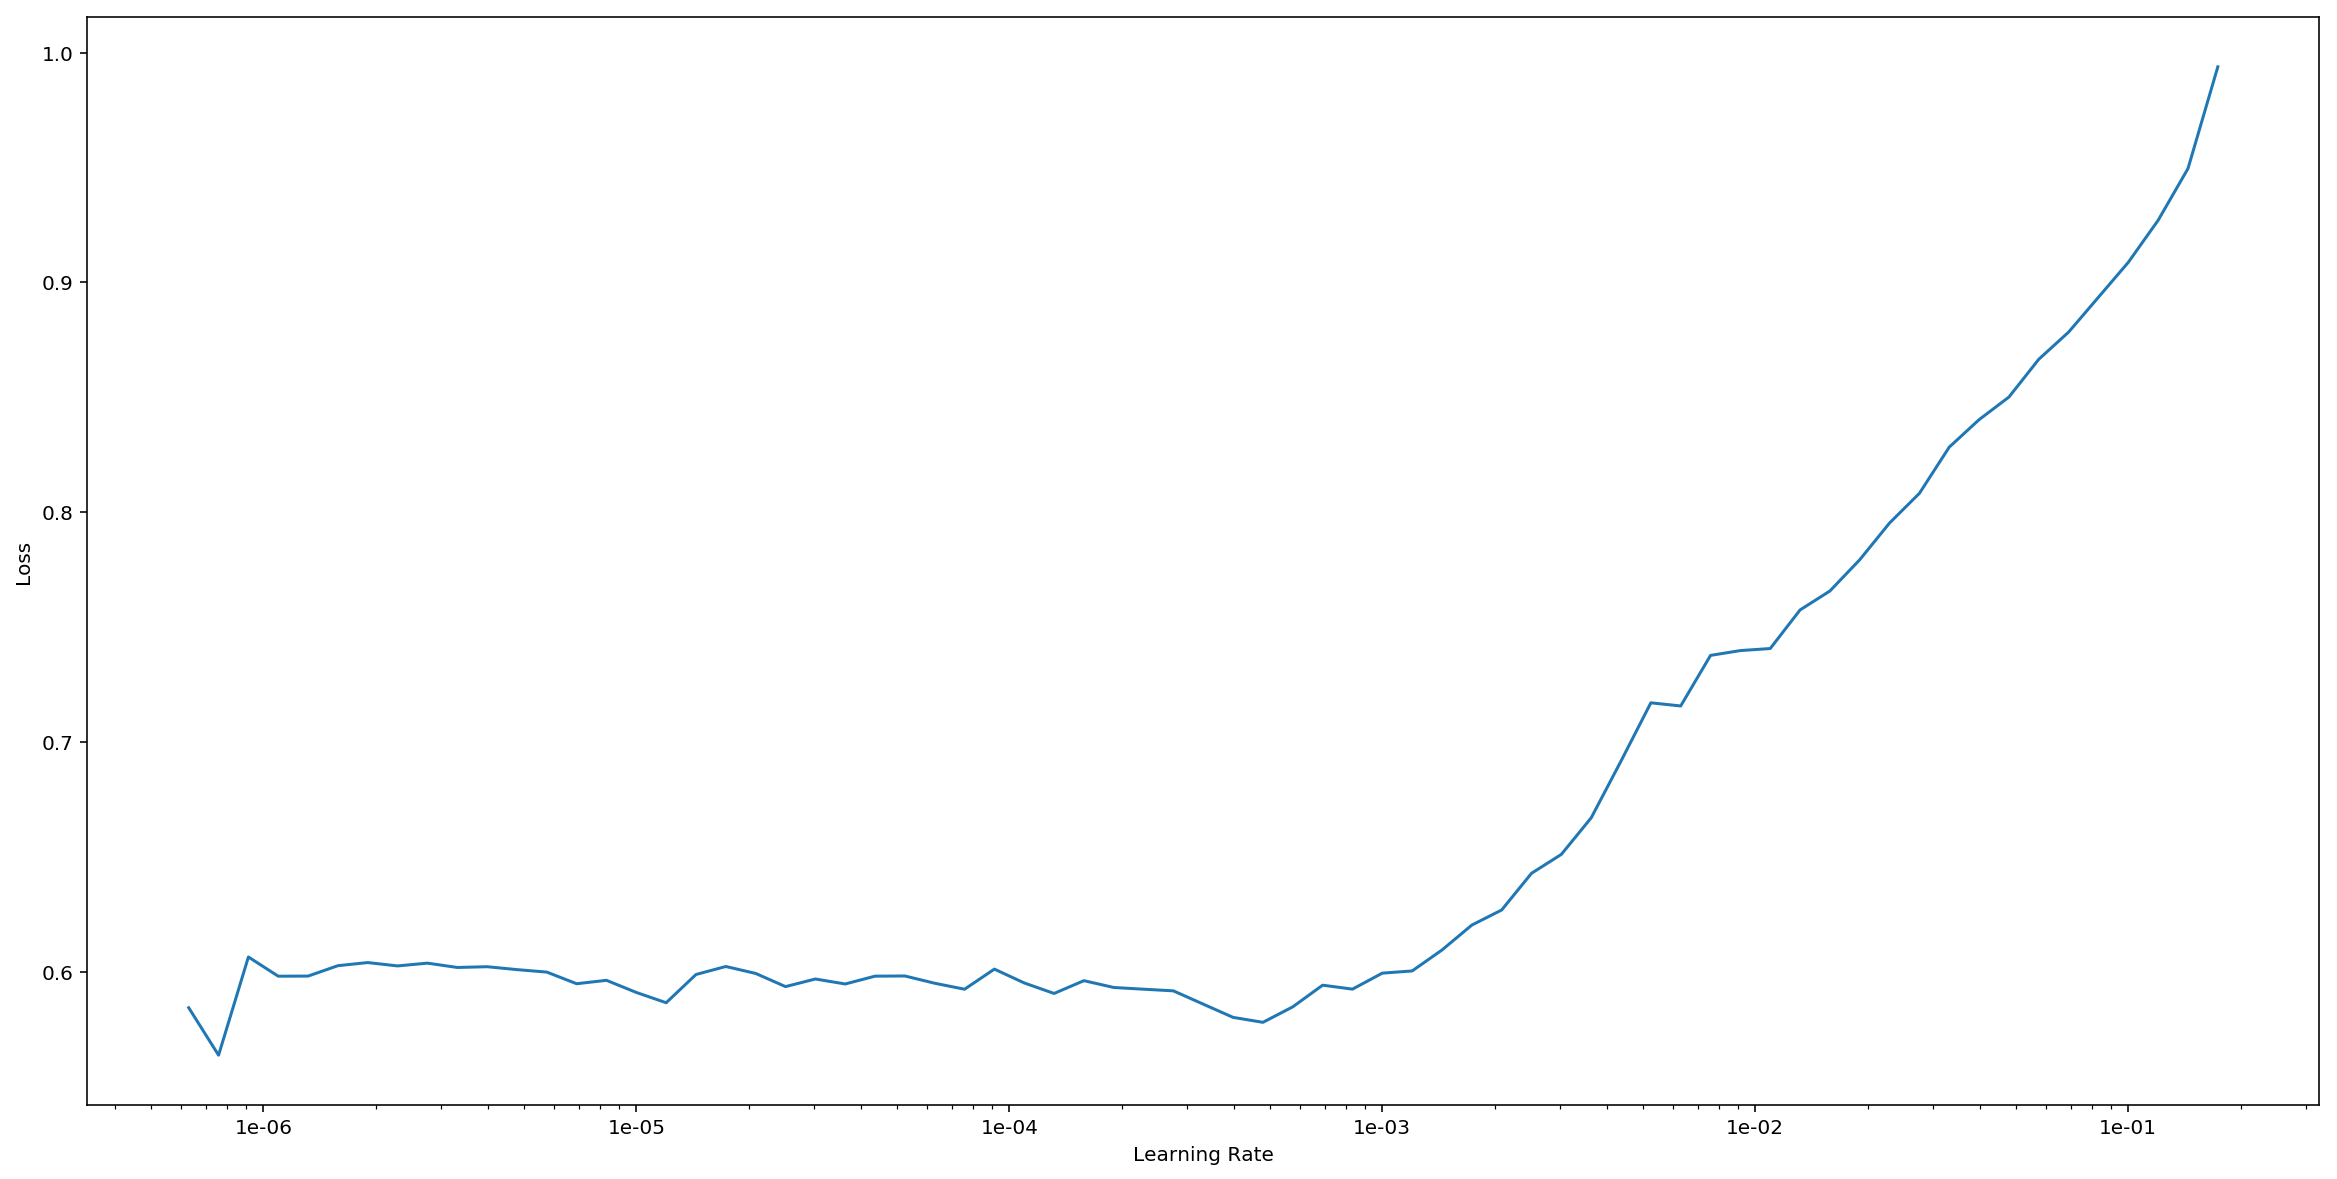

In [69]:
learn.recorder.plot()

In [70]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.559803,0.495525,0.816000,11:03
1,0.533294,0.462507,0.827200,11:12
2,0.505487,0.436310,0.837600,11:14
3,0.483563,0.416979,0.844300,11:16
4,0.472642,0.415255,0.845300,11:15
5,0.478294,0.414331,0.845400,11:17


In [72]:
learn.fit_one_cycle(6, slice(1e-6,1e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.449050,0.407138,0.848200,11:23
1,0.456000,0.409840,0.846500,11:21
2,0.443799,0.403954,0.849300,11:23
3,0.448616,0.403500,0.849900,11:25
4,0.439967,0.403301,0.850400,11:27
5,0.443342,0.398490,0.851600,11:26
